ARDIANSYAH 1207070018

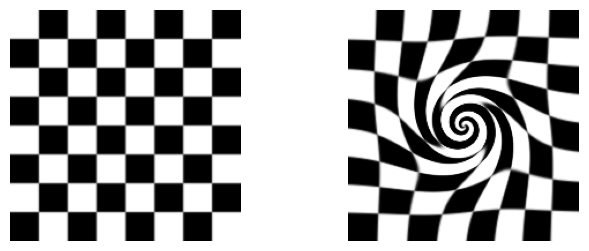

In [7]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl


image = data.checkerboard()
swirled = swirl(image, rotation=0, strength=10, radius=120)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('off')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


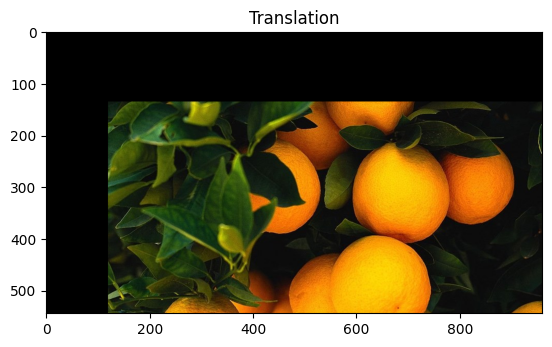

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file foto di Google Drive
file_path = "/content/drive/MyDrive/orange.jpg"

image = cv.imread(file_path)
h, w = image.shape[:2]
half_height, half_width = h//4, w//8
transition_matrix = np.float32([[1, 0, half_width],
                                [0, 1, half_height]])
img_transition = cv.warpAffine(image, transition_matrix, (w, h))
plt.imshow(cv.cvtColor(img_transition, cv.COLOR_BGR2RGB))
plt.title("Translation")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


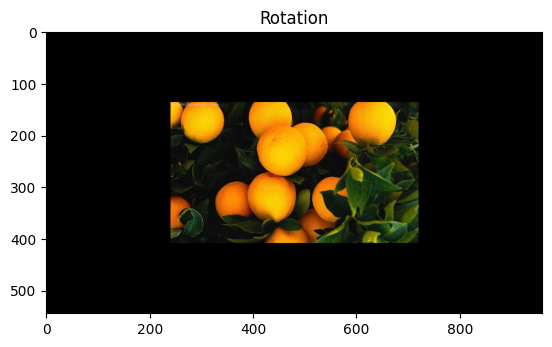

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Menghubungkan dengan Google Drive
drive.mount('/content/drive')

# Path file di Google Drive
file_path = '/content/drive/MyDrive/orange.jpg'

image = cv.imread(file_path)
h, w = image.shape[:2]

rotation_matrix = cv.getRotationMatrix2D((w/2, h/2), -180, 0.5)
rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotation")
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


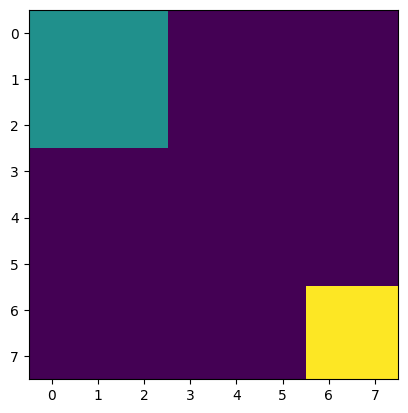

Background size: 9
Size of first region: 4
Sum of first region: 1.4056011115761113


In [21]:
!pip install mahotas

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

regions = np.zeros((8, 8), bool)
regions[:3, :3] = 1
regions[6:, 6:] = 1

labeled, nr_objects = ndimage.label(regions)
plt.imshow(labeled, interpolation='nearest')
plt.show()

labeled, nr_objects = ndimage.label(regions, np.ones((3, 3), bool))

sizes = ndimage.labeled_comprehension(regions, labeled, np.arange(1, nr_objects+1), np.sum, int, 0)
print('Background size:', sizes[0])
print('Size of first region:', sizes[1])

array = np.random.random_sample(regions.shape)
sums = ndimage.labeled_comprehension(array, labeled, np.arange(1, nr_objects+1), np.sum, float, 0)
print('Sum of first region:', sums[1])

